# Predicting heart disease using machine learning

<em>Heart disease includes conditions that narrow or block blood vessels (coronary heart disease). This can lead to a heart attack, angina and some strokes. Heart disease also covers conditions that affect your heart's muscle, valves or cause abnormal rhythms (arrhythmias) (BHF 2019). </em>

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes

**The following would be my approach:**
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement,
>Given clinical parameters about a patient, can we predict whether or not they have heart disease?


# 2. Data
>Origianal data came from Cleavland data from the UCI MAchine Learning Repository. However, this version is also available on Kaggle https://www.kaggle.com/ronitf/heart-disease-uci
Create data disctionary

The following are the features we'll use to predict our target variable (heart disease or no heart disease).


# 3. Evaluation
> If we could reach 95%  accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project

# 4. Features
Here we grab different information about each of the features in the data

**crearte data dictionary**
* age - age in years
* sex - (1 = male; 0 = female)
* cp - chest pain type
0: Typical angina: chest pain related decrease blood supply to the heart
1: Atypical angina: chest pain not related to heart
2: Non-anginal pain: typically esophageal spasms (non heart related)
3: Asymptomatic: chest pain not showing signs of disease
* trestbps - resting blood pressure (in mm Hg on admission to the hospital)
anything above 130-140 is typically cause for concern
* chol - serum cholestoral in mg/dl
serum = LDL + HDL + .2 * triglycerides
above 200 is cause for concern
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
'>126' mg/dL signals diabetes
* restecg - resting electrocardiographic results
        *0: Nothing to note
        *1: ST-T Wave abnormality
        can range from mild symptoms to severe problems
        signals non-normal heart beat
        *2: Possible or definite left ventricular hypertrophy
        Enlarged heart's main pumping chamber
* thalach - maximum heart rate achieved
* exang - exercise induced angina (1 = yes; 0 = no)
* oldpeak - ST depression induced by exercise relative to rest
looks at stress of heart during excercise
unhealthy heart will stress more
* slope - the slope of the peak exercise ST segment
0: Upsloping: better heart rate with excercise (uncommon)
1: Flatsloping: minimal change (typical healthy heart)
2: Downslopins: signs of unhealthy heart
* ca - number of major vessels (0-3) colored by flourosopy
colored vessel means the doctor can see the blood passing through
the more blood movement the better (no clots)
* thal - thalium stress result
1,3: normal
6: fixed defect: used to be defect but ok now
7: reversable defect: no proper blood movement when excercising
* target - have disease or not (1=yes, 0=no) (= the predicted attribute)

# Preparing the tools
Were going to use pandas, matplotlib and Numpy for data analysis and manipulation

In [1]:
# Importing all the tools I will need

# Regular EDA and plotting Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

# Models from Sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

# Load data

In [2]:
df = pd.read_csv("heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [3]:
df.shape

(303, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Lets find out how many of each class we have in the target variable

In [7]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

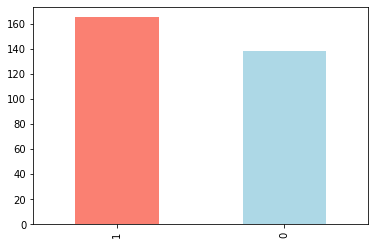

In [8]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

### Checking if we have missing values

In [9]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

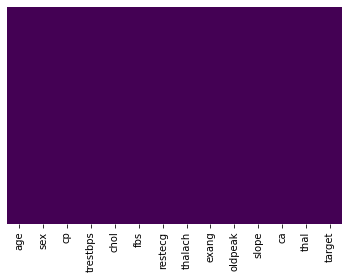

In [10]:
sns.heatmap(df.isna(),cmap="viridis", yticklabels=False,cbar=False);

#### Describing the data

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


# Finding patterns in the data, by comparing columns in the data

> ### Heart Disease Frequency according to Sex

In [12]:
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

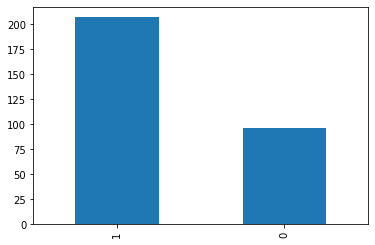

In [14]:
df["sex"].value_counts().plot(kind="bar");

In [15]:
# Compare target column with sex column

pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


In [24]:
# Setting the style for my plots

sns.set_style("whitegrid")

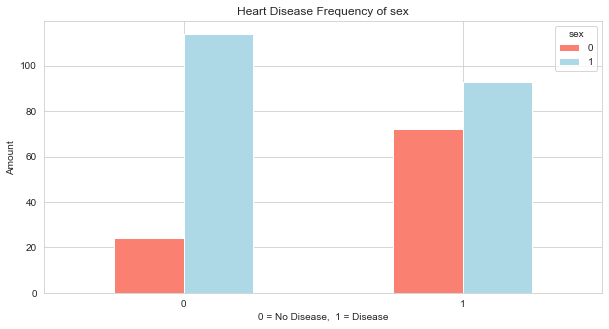

In [25]:
pd.crosstab(df.target,df.sex).plot(kind ="bar",
                                  figsize=(10,5),
                                  color=["salmon", "lightblue"])

plt.title("Heart Disease Frequency of sex")
plt.xlabel("0 = No Disease,  1 = Disease")
#plt.legend(["Female","Male"])
plt.ylabel("Amount")

plt.xticks(rotation=0);

> ### Age vs. Max Heart Rate for Heart Disease¶


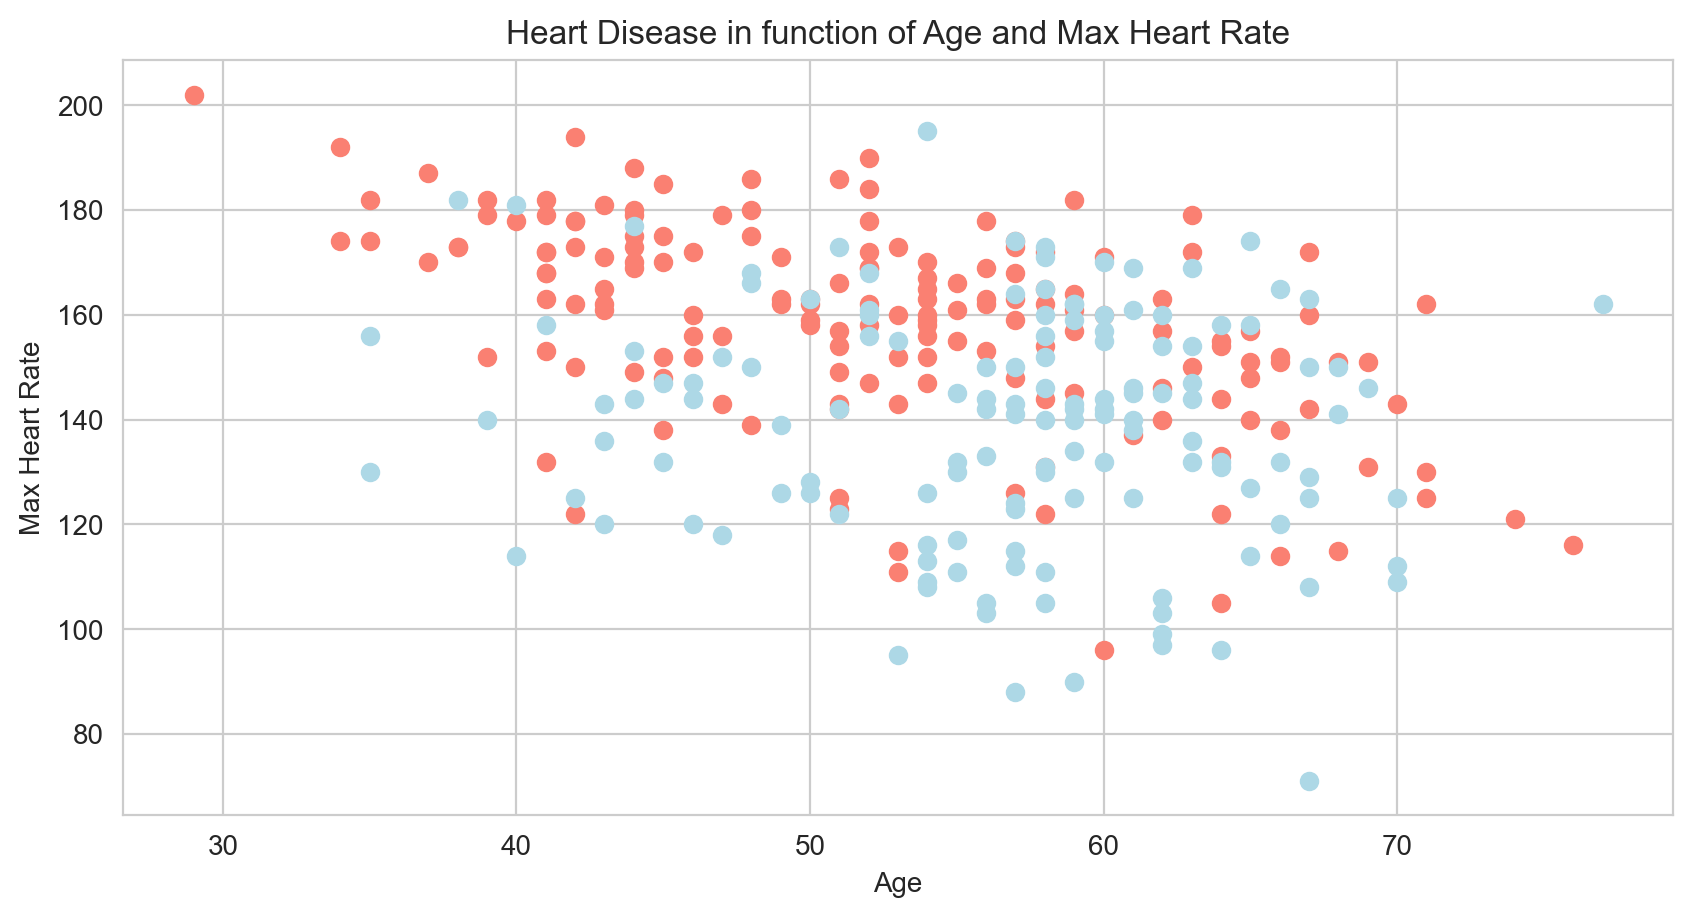

In [37]:
# Create another figure
plt.figure(figsize=(10,5),dpi=200)

# Scatter with positive examples >>> 
#*********(df["age"][df["target"]==1] --> gives me age were target was 1 ie positive)****
plt.scatter(df["age"][df["target"]==1], df["thalach"][df["target"]==1], c="salmon");


# Scatter with Negative examples >>> 
plt.scatter(df["age"][df["target"]==0], df["thalach"][df["target"]==0], c="lightblue");

# Add some helpful information to the plot
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate");

#plt.legend(["Disease", "No Disease"])

#### Rendering thesame plot above but using Seaborn

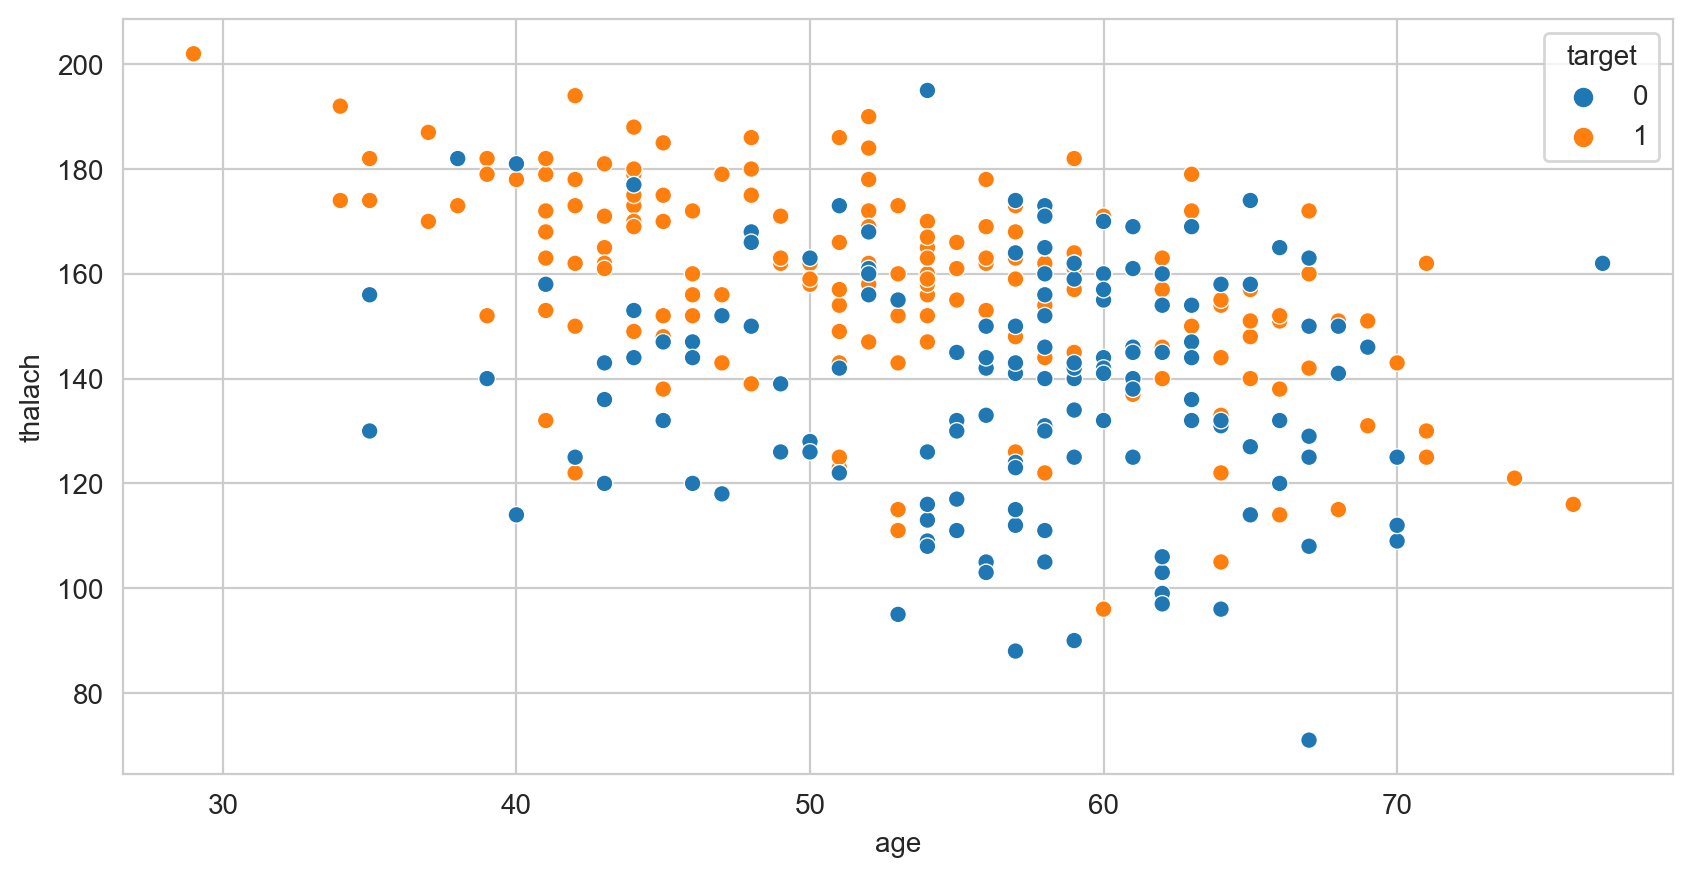

In [39]:
plt.figure(figsize=(10,5),dpi=200)
sns.scatterplot(x=df.age,y=df.thalach, hue=df.target);

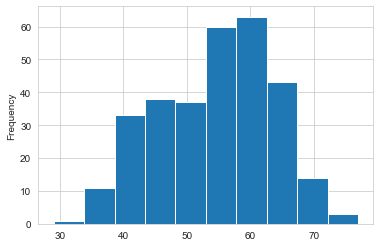

In [40]:
# Check the distribution of the Age column with a histogram

df.age.plot.hist();

> ## Heart Disease Frequency per chest pain type

**cp - chest pain type** 
* 0: Typical angina: chest pain related decrease blood supply to the heart 
* 1: Atypical angina: chest pain not related to heart 
* 2: Non-anginal pain: typically esophageal spasms (non heart related) 
* 3: Asymptomatic: chest pain not showing signs of disease

In [41]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


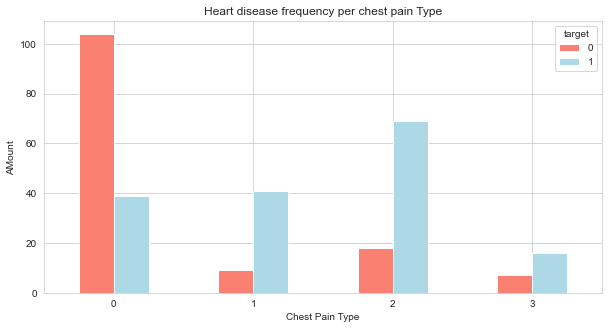

In [44]:

pd.crosstab(df.cp, df.target).plot(kind="bar",
                                  figsize=(10,5),
                                  color=["salmon","lightblue"])

# add some communication
plt.title("Heart disease frequency per chest pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("AMount")
#plt.legend(["No disease", "Disease"])
plt.xticks(rotation=0);

In [49]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


> # Make a correlation Matrix

In [52]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


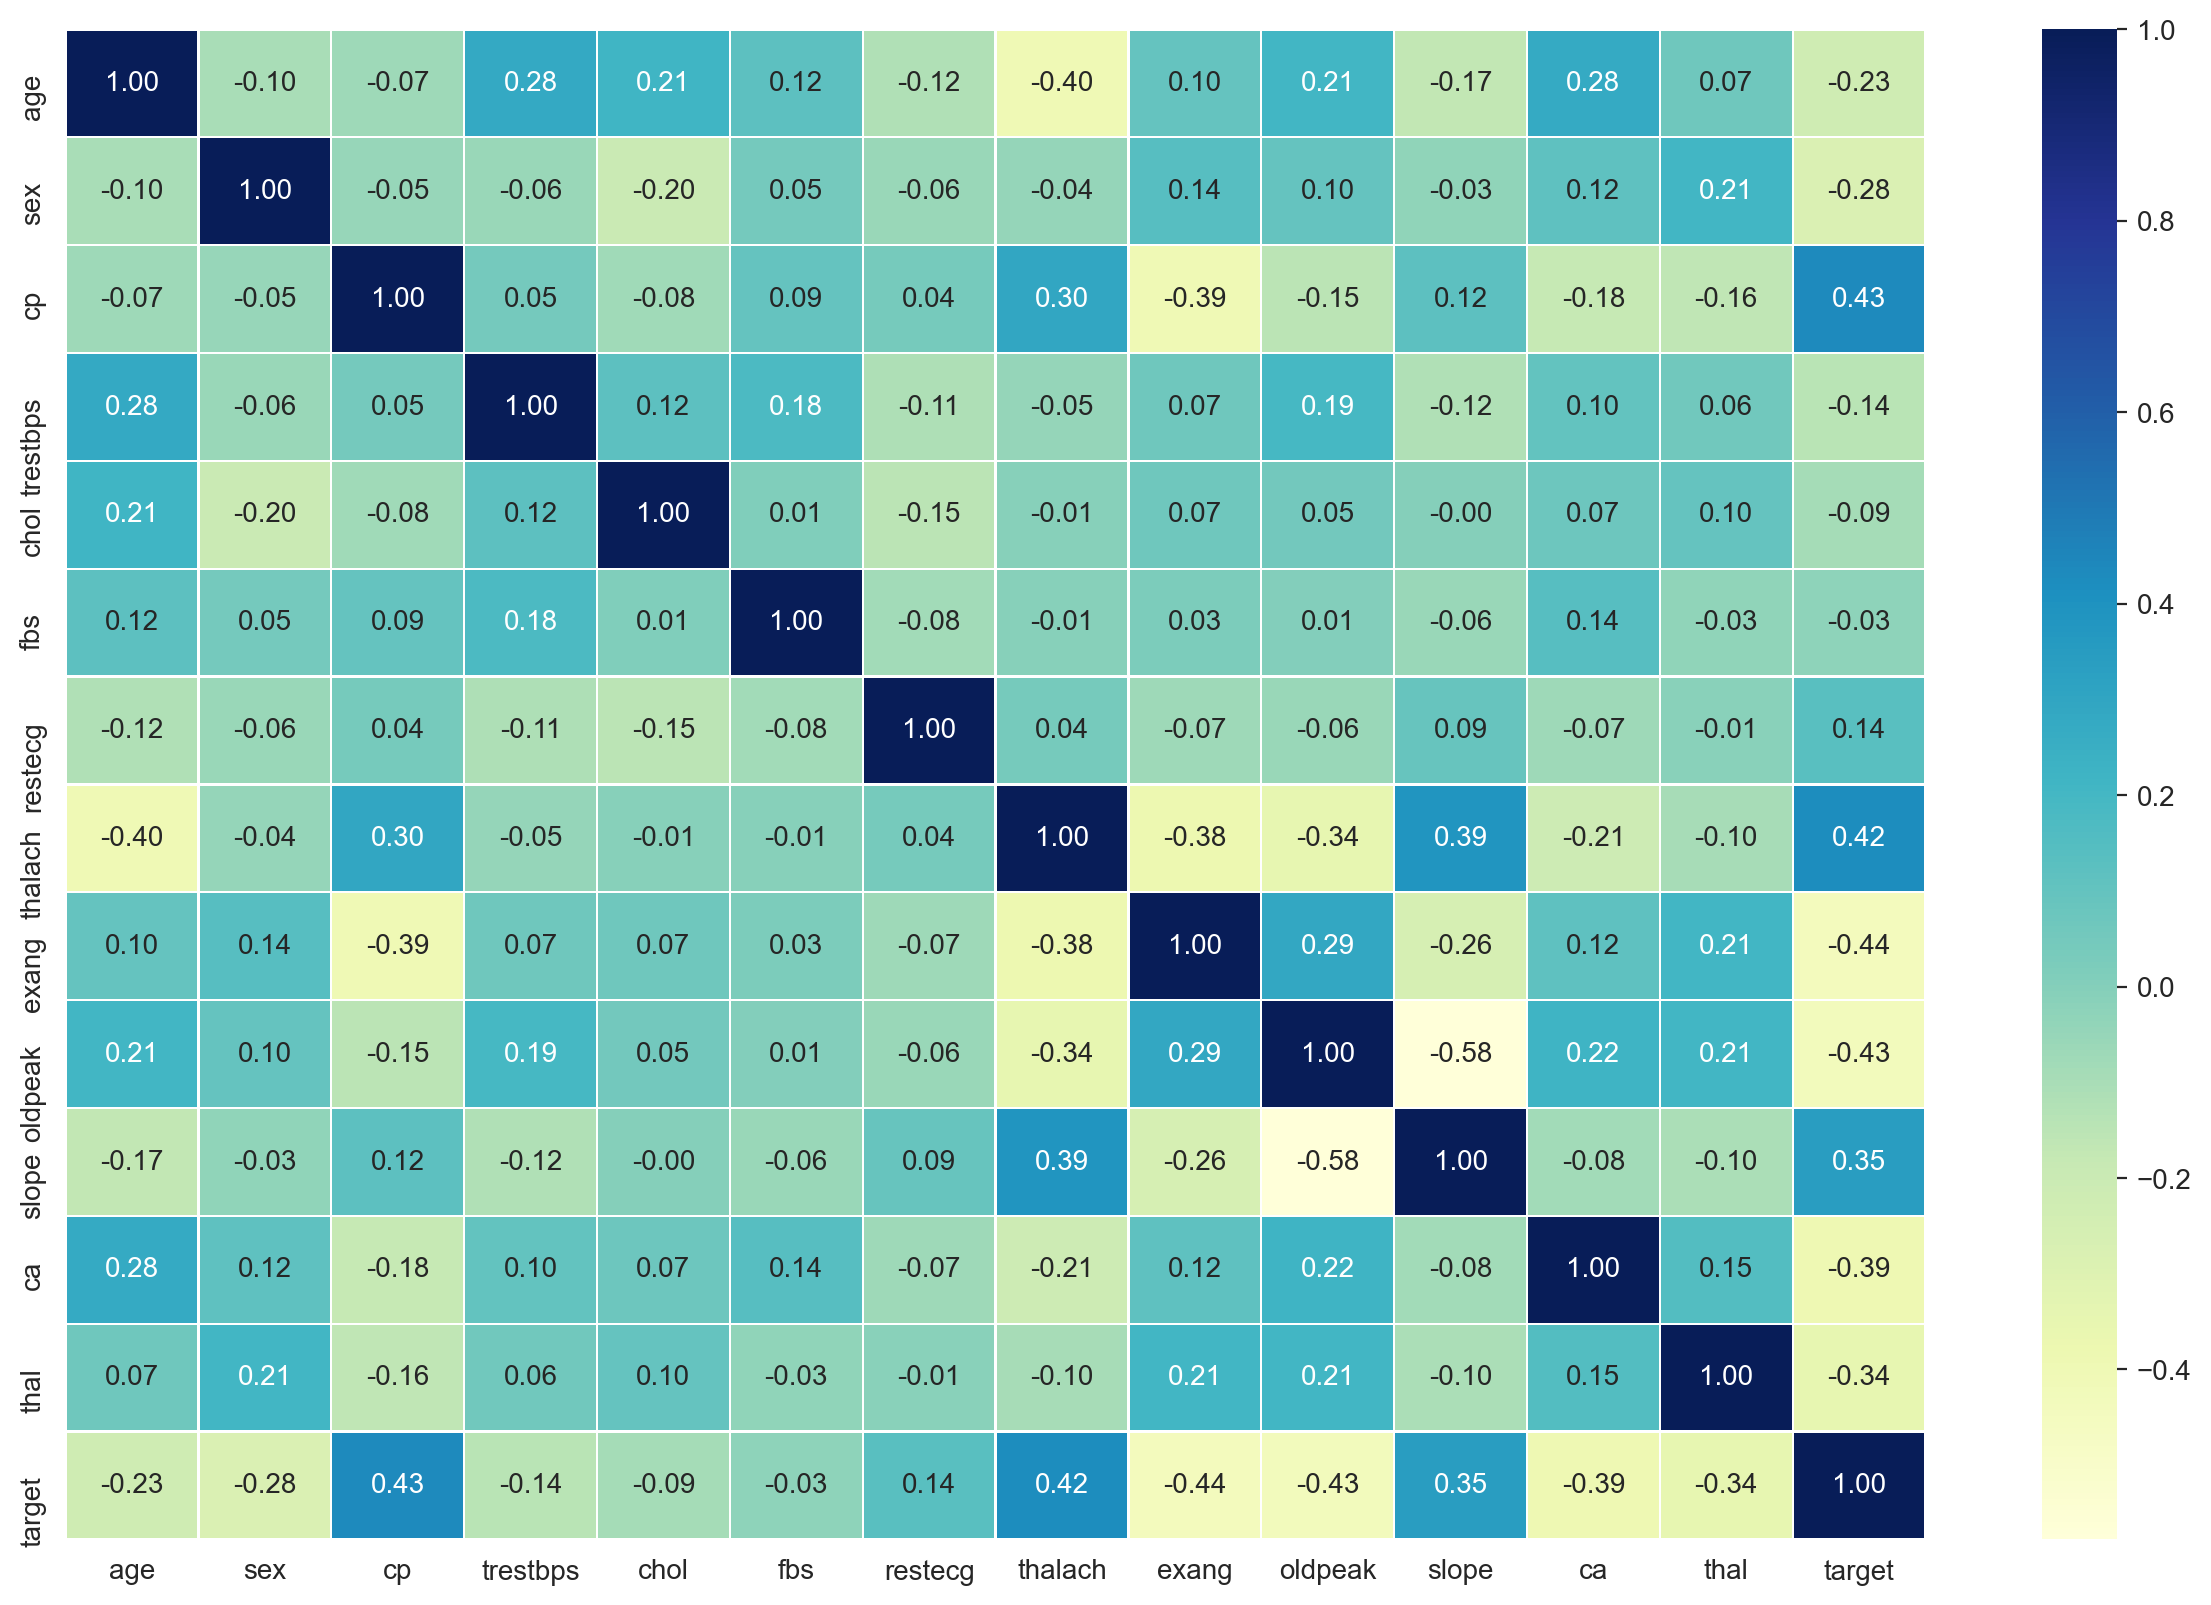

In [53]:
#lets make the correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10),dpi=200)
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");

#***just incase it cuts off for older versions of Matplotlib
# bottom, top = ax.get_ylim()
# ax.set_ylim(bottom + 0.5, top - 0.5)

> # Modelling

In [54]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [55]:
# Split data into X and y

X= df.drop("target",axis=1)
y = df["target"]

In [56]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [57]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

### Split data into train test split

In [58]:
# Set random seed
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [59]:
print(f"x_train shape: {X_train.shape}, y_train shape: {y_train.shape}")

x_train shape: (242, 13), y_train shape: (242,)


> ### Now we've got our data splits into training and test sets, its time to build a machine learning model.

> * we'll train it (find patterns ) on the training set.

> * and then we'll test it (use the patterns) on the test set.

> ### **We will try 3 different machine learning models:**
    > ### 1. Logistic Regression
    > ### 2. K-nearest Neighbours classifier
    > ### 3. Random Forest Classifier

In [60]:
# Put Modeles in a Dictionary

models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

# Create a Function to fit and score the models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    This function is to fit and evaluate given machine learning moels.
    Models: a dictionary of different scikit-learn machine learning models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: test labels
    """
    # Set Random seed
    np.random.seed(42)
    
    # Make a disctionary to keep model scores
    model_scores = {}
    
    # Loop through models
    for name, model in models.items():
        # fit the model to the data
        model.fit(X_train, y_train)
        
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test,y_test)
    return model_scores

In [61]:
model_scores = fit_and_score(models=models, 
                             X_train= X_train, 
                             X_test=X_test,
                            y_train= y_train,
                            y_test=y_test)

model_scores

/Users/mikelakoju/2021_DS_ML_Andrei/heart-disease-project/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Baseline Model Comparison

In [62]:
model_compare = pd.DataFrame(model_scores,index=["accuracy"])

print(model_compare)

          Logistic Regression       KNN  Random Forest
accuracy             0.885246  0.688525       0.836066


In [63]:
model_compare

,Logistic Regression,KNN,Random Forest
accuracy,0.885246,0.688525,0.836066


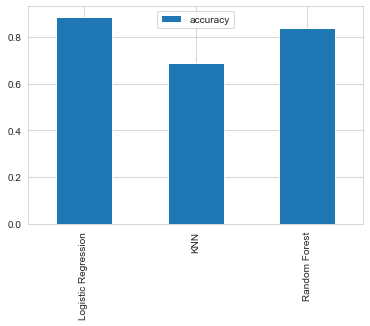

In [64]:
model_compare.T.plot.bar();

> ## Now we have a baseline model... and we know a model's first predictions aren't always what we should always run-with.

**What Next?**
> Lets look at the following:
* Hypyterparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

### Hyperparameter tuning (by hand)

In [65]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

#Septup KNN instances
knn = KNeighborsClassifier()

# Loop through different n_neighbours
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    #Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [66]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [67]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


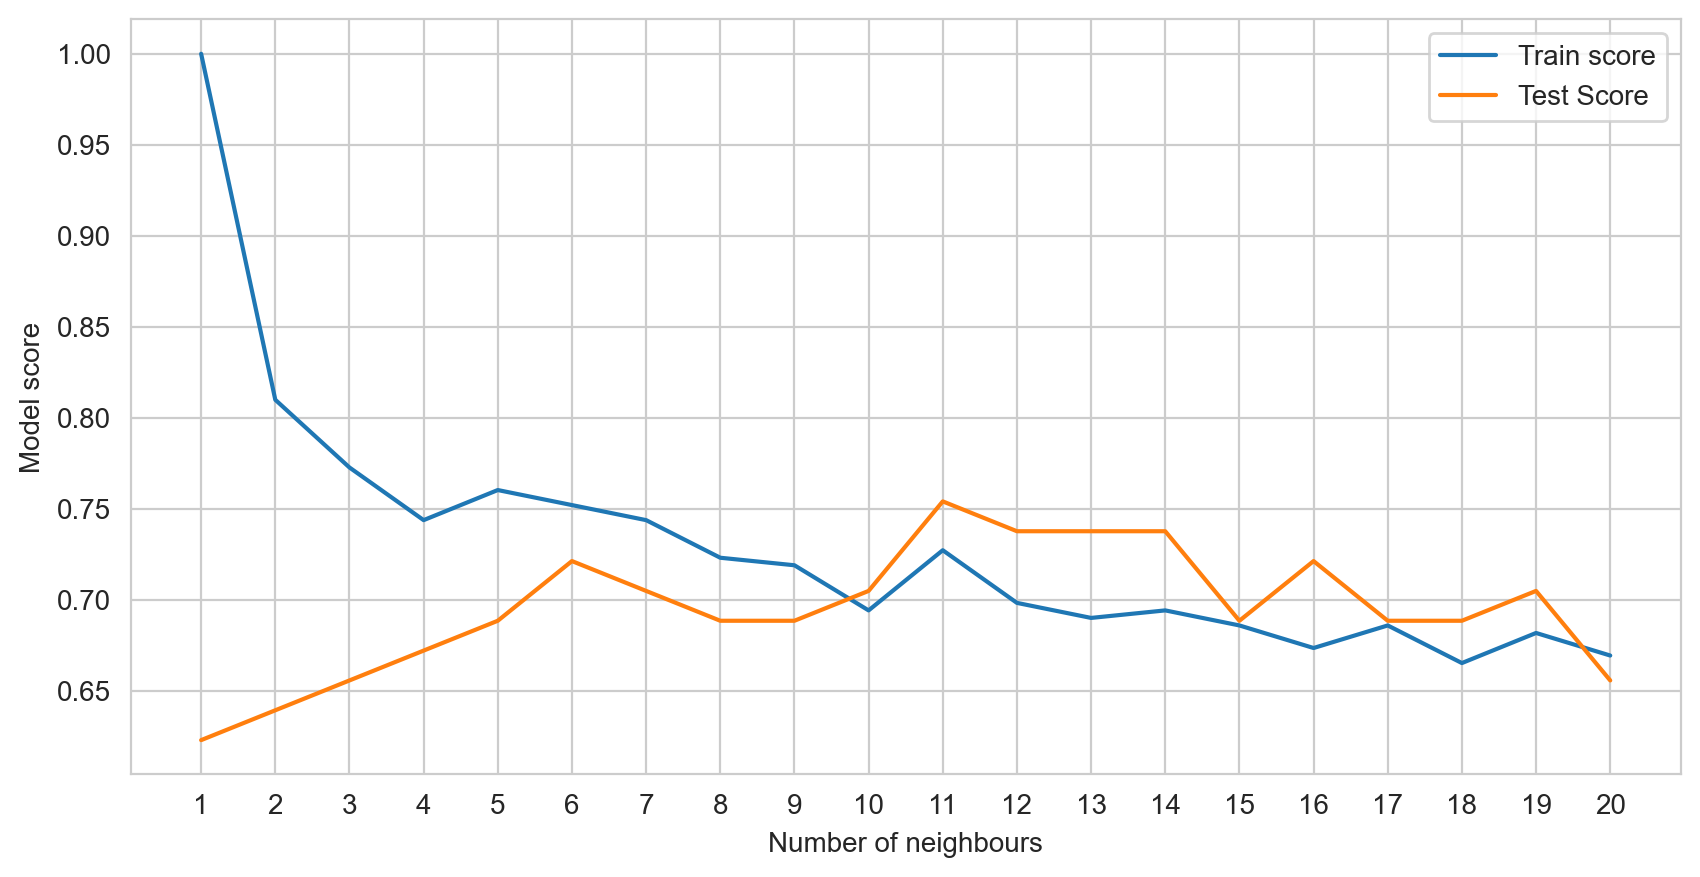

In [70]:
plt.figure(figsize=(10,5),dpi=200)
plt.plot(neighbors, train_scores, label="Train score")

plt.plot(neighbors, test_scores, label="Test Score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbours")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")


plt.show();

# Hyperparameter tuning with RandomizedSearchCV
**I am going to tune:**
* LogisticRegression()
* RandomForestClassifier()

>## ...Using RandomizedSearchCV

In [71]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 5, 20),
               "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10,1000, 50),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 2)}

> #### Now we'ver got hyperparameters setup for each of our models, let's tune them using RandomizedSearchCV...

In [72]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)


# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.97635144e-04, 8.85866790e-04, 2.63665090e-03,
       7.84759970e-03, 2.33572147e-02, 6.95192796e-02, 2.06913808e-01,
       6.15848211e-01, 1.83298071e+00, 5.45559478e+00, 1.62377674e+01,
       4.83293024e+01, 1.43844989e+02, 4.28133240e+02, 1.27427499e+03,
       3.79269019e+03, 1.12883789e+04, 3.35981829e+04, 1.00000000e+05]),
                                        'solver': ['liblinear']},
                   verbose=True)

#### Checking best paraeters 

In [73]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.2069138081114788}

> #### Now we've tuned LogisticRegression(), let's do the same for RandomForestClassifier()...
### Tuning RandomForestClassifier()...¶

In [74]:
# Setup random seed
np.random.seed(42)

# Setup random hypyerparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)

# Fit random hyperparameter search model for randomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [75]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [77]:
# Evaluate the randomized search RandomForestClassifier Model
rs_rf.score(X_test, y_test)

0.8688524590163934

# Hyperparameter Tuning with GridSearchCV

since our LogisticRegression model provides the best scores so far, we'll try and improve them again using GridSearchCV...

In [78]:
# Different hyperparameters for our LogisticsRegression model

log_reg_grid = {"C": np.logspace(-4, 4, 30),
               "solver": ["liblinear"]}


# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

# fit grid Hyperparameters  sear model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [79]:
# check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [80]:
# Evaluate the grid search LogisticRegression Model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

># Evaluting our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

... and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions.

In [81]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [82]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [83]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

> ### Plot ROC Curve and calculate AUC Metric¶

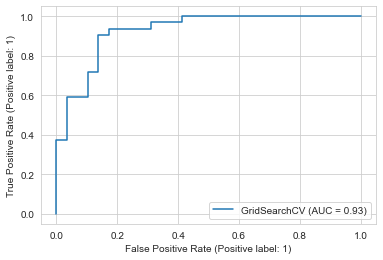

In [91]:

plot_roc_curve(gs_log_reg, X_test, y_test);

> ### Confusion matrix

In [92]:
print(confusion_matrix(y_test, y_preds))


[[25  4]
 [ 3 29]]


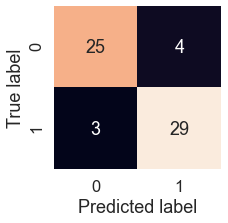

In [93]:
# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size
 
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
plot_conf_mat(y_test, y_preds)


> Now we've got a ROC curve, an AUC metric and a confusion matrix, let's get a classification report as well as cross-validated precision, recall and f1-score.
> ### Classification Report

In [94]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Calculate evaluation metrics using cross-validation

We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using `cross_val_score()`.

In [95]:
# Check best hyperparameters

gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [96]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

In [97]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,X,y,cv=5,scoring="accuracy")

cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [98]:
cv_acc =np.mean(cv_acc)
cv_acc

0.8446994535519124

In [99]:
# Cross-validated precision
cv_precision = cross_val_score(clf,X,y,cv=5,scoring="precision")

cv_precision = np.mean(cv_precision)
cv_precision 

0.8207936507936507

In [100]:
# Cross-validated recall
cv_recall = cross_val_score(clf,X,y,cv=5,scoring="recall")

cv_recall = np.mean(cv_recall)
cv_recall 

0.9212121212121213

In [101]:
# Cross-validated F1-score
cv_f1 = cross_val_score(clf,X,y,cv=5,scoring="f1")

cv_f1 = np.mean(cv_f1)
cv_f1 

0.8673007976269721

In [102]:
# Visualize cross-validated metric

cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_precision,
                          "Recall": cv_recall,
                          "F1": cv_f1},
                         index =[0])

In [103]:
cv_metrics

,Accuracy,Precision,Recall,F1
0,0.844699,0.820794,0.921212,0.867301


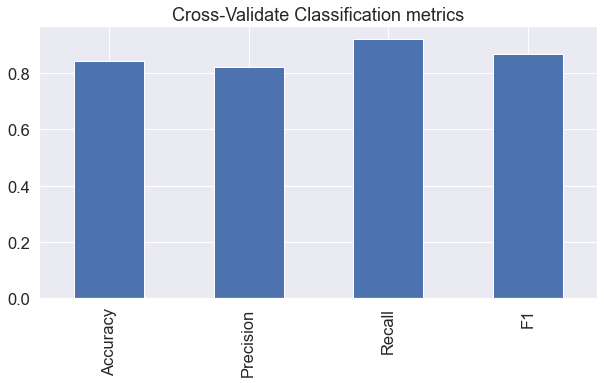

In [130]:

cv_metrics.T.plot.bar(title="Cross-Validate Classification metrics",  
                    figsize=(10,5),legend=False);


# Feature Importance
> #### We are basically asking which of these features 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', contribibute the most in predicting if a patient has heart disease. 
       
Feature importance is another way of us asking, "which features contributed most to the outcomes of the model and how did they contribute?"

Please note, Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance".

Let's find the feature importance for our LogisticRegression model...

In [135]:
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [136]:
# Fit an instance of LogisticRegression

clf = LogisticRegression(C=0.20433597178569418,
                        solver = 'liblinear')

clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [137]:
# Check coeficients (coef)
clf.coef_

array([[ 0.00316727, -0.86044582,  0.66067073, -0.01156993, -0.00166374,
         0.04386131,  0.31275787,  0.02459361, -0.60413038, -0.56862852,
         0.45051617, -0.63609863, -0.67663375]])

In [138]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672721856887734,
 'sex': -0.860445816920919,
 'cp': 0.6606707303492849,
 'trestbps': -0.011569930902919925,
 'chol': -0.001663741604035976,
 'fbs': 0.04386130751482091,
 'restecg': 0.3127578715206996,
 'thalach': 0.02459360818122666,
 'exang': -0.6041303799858143,
 'oldpeak': -0.5686285194546157,
 'slope': 0.4505161679452401,
 'ca': -0.6360986316921434,
 'thal': -0.6766337521354281}

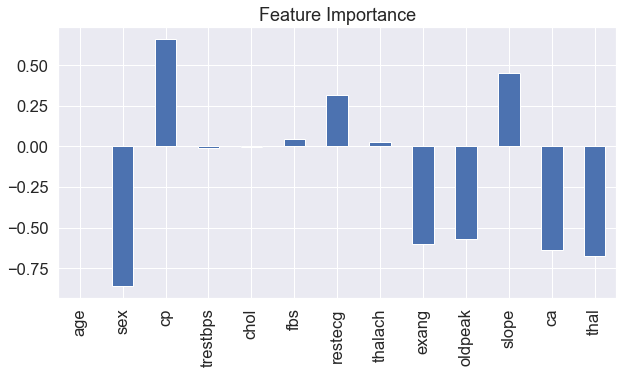

In [139]:
# Visualize feature importance

feature_df = pd.DataFrame(feature_dict, index=[0])


feature_df.T.plot.bar(title="Feature Importance",figsize=(10,5),legend=False);


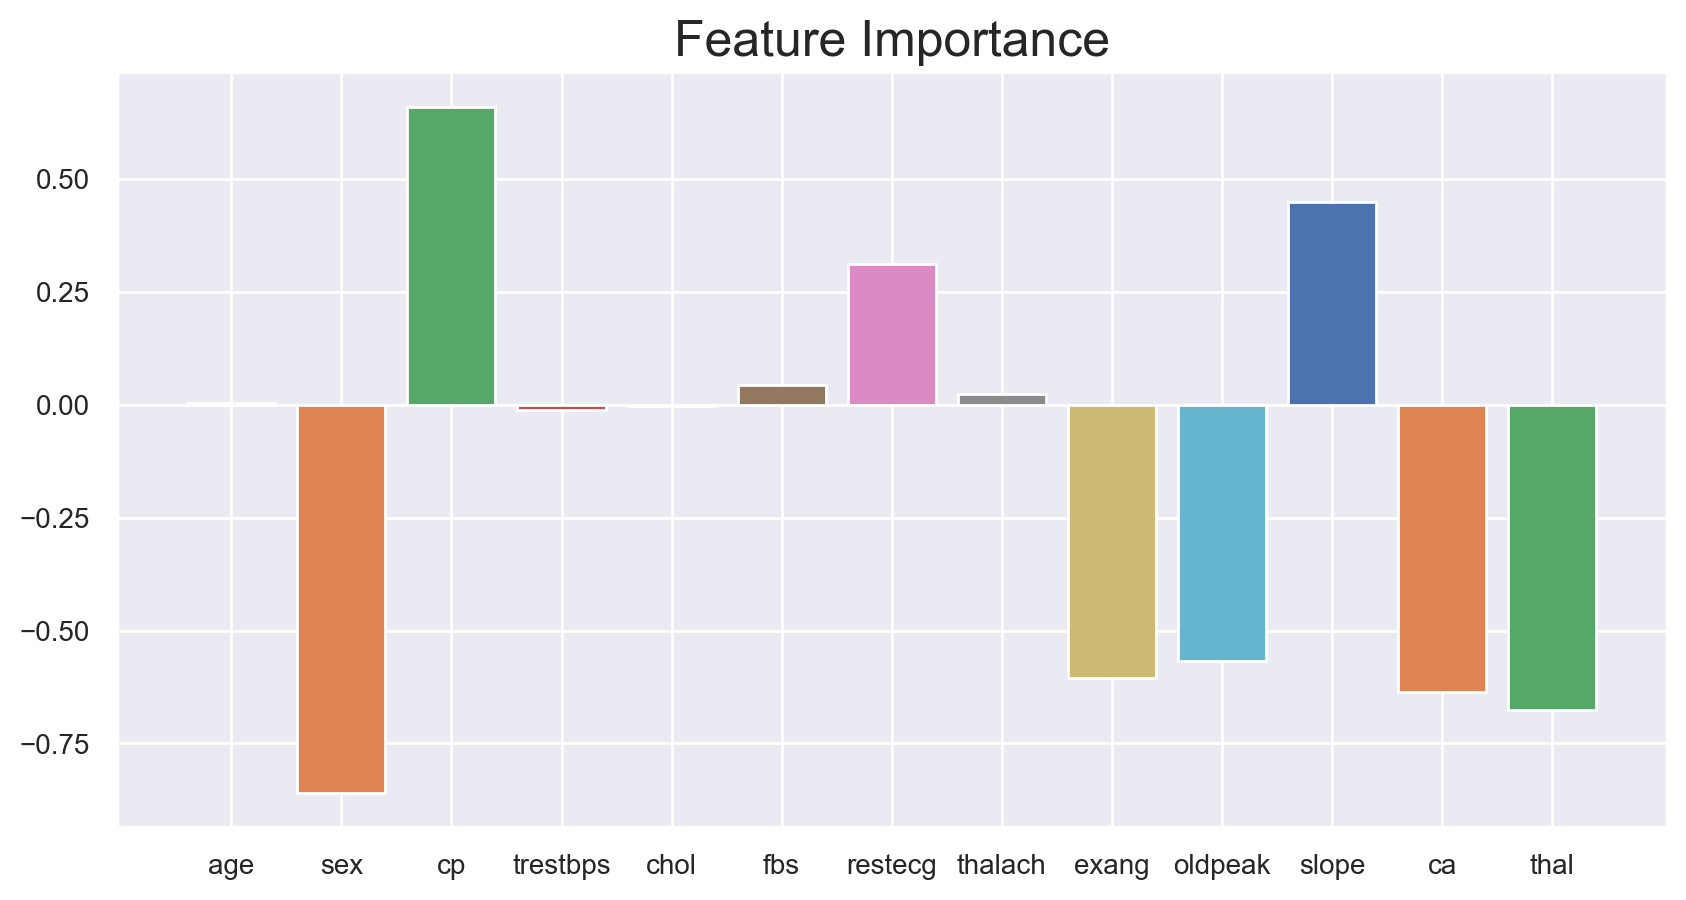

In [151]:
#Large plot showing "Feature Importance"

plt.figure(figsize=(10,5),dpi=200)
for gg,bb in feature_df.items():
    
    plt.bar(gg,bb)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.title("Feature Importance")
    
    

In [152]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [153]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107
